# Deutsch’s Algorithm

 <h3>What is Deutsch’s Algorithm?</h3>

Deutsch’s Algorithm is the first quantum algorithm, which can determine if a function is constant or balanced using only one query. This contrasts with classical algorithms, which require multiple queries.

A constant function is one that always outputs the same value.
A balanced function is one that outputs 0 half of the time and 1 half of the time.

<h2>Problem Statement</h2>

$f: \{0, 1\}^n \to \{0, 1\}$

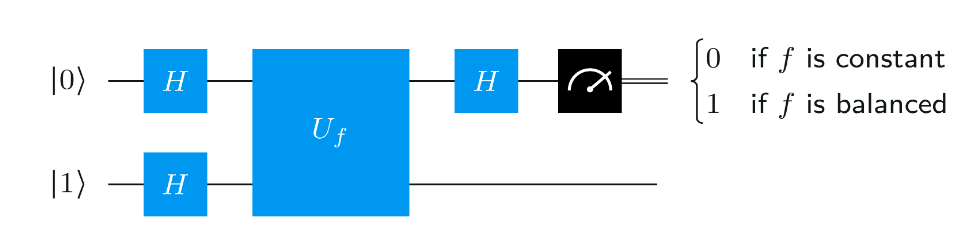

Given a black box function f: {0, 1} → {0, 1}, determine whether f is a constant function or a balanced function. An oracle acts as a black box function

Deutsch's algorithm can solve this problem with only one query to the black box function. This is a significant improvement over any classical algorithm, which would require evaluating the function at both 0 and 1 to determine its behavior.

<h2>Steps</h2>

1. Initialize the two qubits to the state $|0\rangle|1\rangle$.
2. Apply a Hadamard gate to each qubit.
3. Apply the function to the two qubits.
4. Apply another Hadamard gate to the first qubit.
5. Measure the first qubit.

# Implementation of Deutsch's Algorithm

<h3>Set up the Environment</h3>

In [14]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, Aer, execute
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram
from qiskit.extensions import Initialize
from qiskit.circuit import Gate

<h3>Build the Quantum Circuit</h3>

In [15]:
# Define constant function
def constant_function():
    qc = QuantumCircuit(2) # Since the function is constant, no operation is performed on the qubit.
    return qc

In [16]:
# Define define balanced function
def balanced_function():
    qc = QuantumCircuit(2) # CNOT gate flips the second qubit if the first qubit is |1>
    qc.cx(0, 1)
    return qc

<h4>Step 1: Initialize the two qubits to the state $|0\rangle|1\rangle$.</h4>

In [17]:
qc = QuantumCircuit(2,1)
# The first qubit should be in state |0> (which it already is by default).
# The second qubit should be in state |1>, which is achieved by applying an X gate.
qc.x(1)
print("Set the first qubit to |0> and the second qubit to |1>")
qc.draw('mpl', style='iqp')  
qc.barrier()


Set the first qubit to |0> and the second qubit to |1>


<h4>Step 2: Apply a Hadamard gate to each qubit.</h4>

In [18]:
# Apply a Hadamard gate to both qubits
qc.h(0)
qc.h(1)
print("Apply a Hadamard gate to both qubits")
qc.draw('mpl', style='iqp')  
qc.barrier()

Apply a Hadamard gate to both qubits


<h4>Step 3: Apply the function to the two qubits.</h4>

In [20]:
# Apply the function
qc.append(constant_function(), [0, 1])
print("Apply the UF function")
qc.draw('mpl', style='iqp')  
qc.barrier()

Apply the UF function


<h4>Step 4: Apply another Hadamard gate to the first qubit.</h4>

In [21]:
# Apply another Hadamard gate to the input qubit
qc.h(0)
print("Apply another Hadamard gate to the input qubit")
qc.draw('mpl', style='iqp') 
qc.barrier()

Apply another Hadamard gate to the input qubit


<h4>Step 5: Measure the first qubit.</h4>

In [22]:
# Measurement
qc.measure(0, 0)
qc.draw('mpl', style='iqp')
qc.barrier()

# The quantum circuit for the Deutsch algorithm

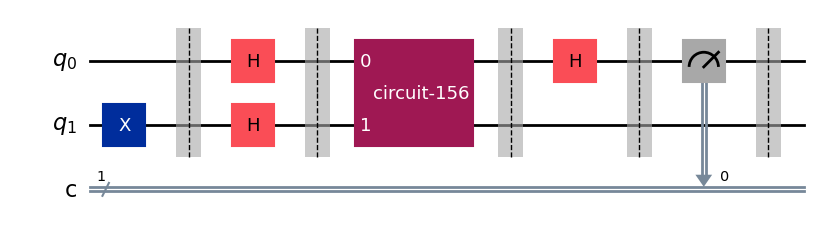

In [23]:
qc.draw('mpl', style='iqp')

In [24]:
# Simulate the circuit
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend)
result = job.result()

# Get the counts of measurement outcomes
counts = result.get_counts(qc)
print(counts)

{'0': 1024}


<h4>What Does the Output Mean?</h4>

Result 0: If you get 0, it indicates that the function implemented is constant. This means the function gives the same output for all inputs.

Result 1: If you get 1, it suggests that the function is balanced. A balanced function outputs 0 for half the inputs and 1 for the other half.

The aspect of Deutsch's Algorithm is that it requires only one query to the oracle to determine whether the function is constant or balanced. This is a significant improvement over classical algorithms, which would require two queries (one for each possible input) to determine the nature of the function.